In [141]:
UNIQUENAME = 'alnewma'

# SI618 Final Project: Avocados Over Time

### 4 Questions
- 1. Look at time series trend, see if it's normal for Total Volume sold and Average Price data: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/.
- 2. Create prediction of Total Volume sold(future data prediction) compare conventional to organic
- 3. Look to see if there is seasonality in the time series data. If so, what do the seasonal trends tells us?
- 4. See if price differences are statistically significant between two cities with similar population sizes are are in a similar region

![AvoUrl_1](https://s3.amazonaws.com/media.muckrack.com/mrdaily/site/images/2016/06/06/walkingavocado.gif "avo_1")

### 1. Import Libraries

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from fbprophet import Prophet
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 2. Data Preprocessing: Read in the data - add month and day columns

In [62]:
avocado = pd.read_csv('avo_data/avocado.csv')

In [112]:
avocado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,29
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany,11,22
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany,11,15
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany,11,8
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany,11,1
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany,10,25


In [64]:
#--Look at data types for each column--
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Create month and day column 

In [65]:
#--Convert Date column and add Month and Day columns--
avocado['Date'] = pd.to_datetime(avocado['Date']) #convert Date column from object to datetime
avocado['Month'] = avocado['Date'].dt.month
avocado['Day'] = avocado['Date'].dt.day
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Drop unnecessary columns

In [66]:
#--Drop unnamed column, has the same values as the index--
avocado = avocado.drop(['Unnamed: 0'], axis=1)

In [67]:
#--Check if there is any missing data--
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [68]:
#--Checking data types--
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
Month           18249 non-null int64
Day             18249 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 2.1+ MB


In [69]:
#--Take a look at all of the columns included--
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

### 3. General Trends

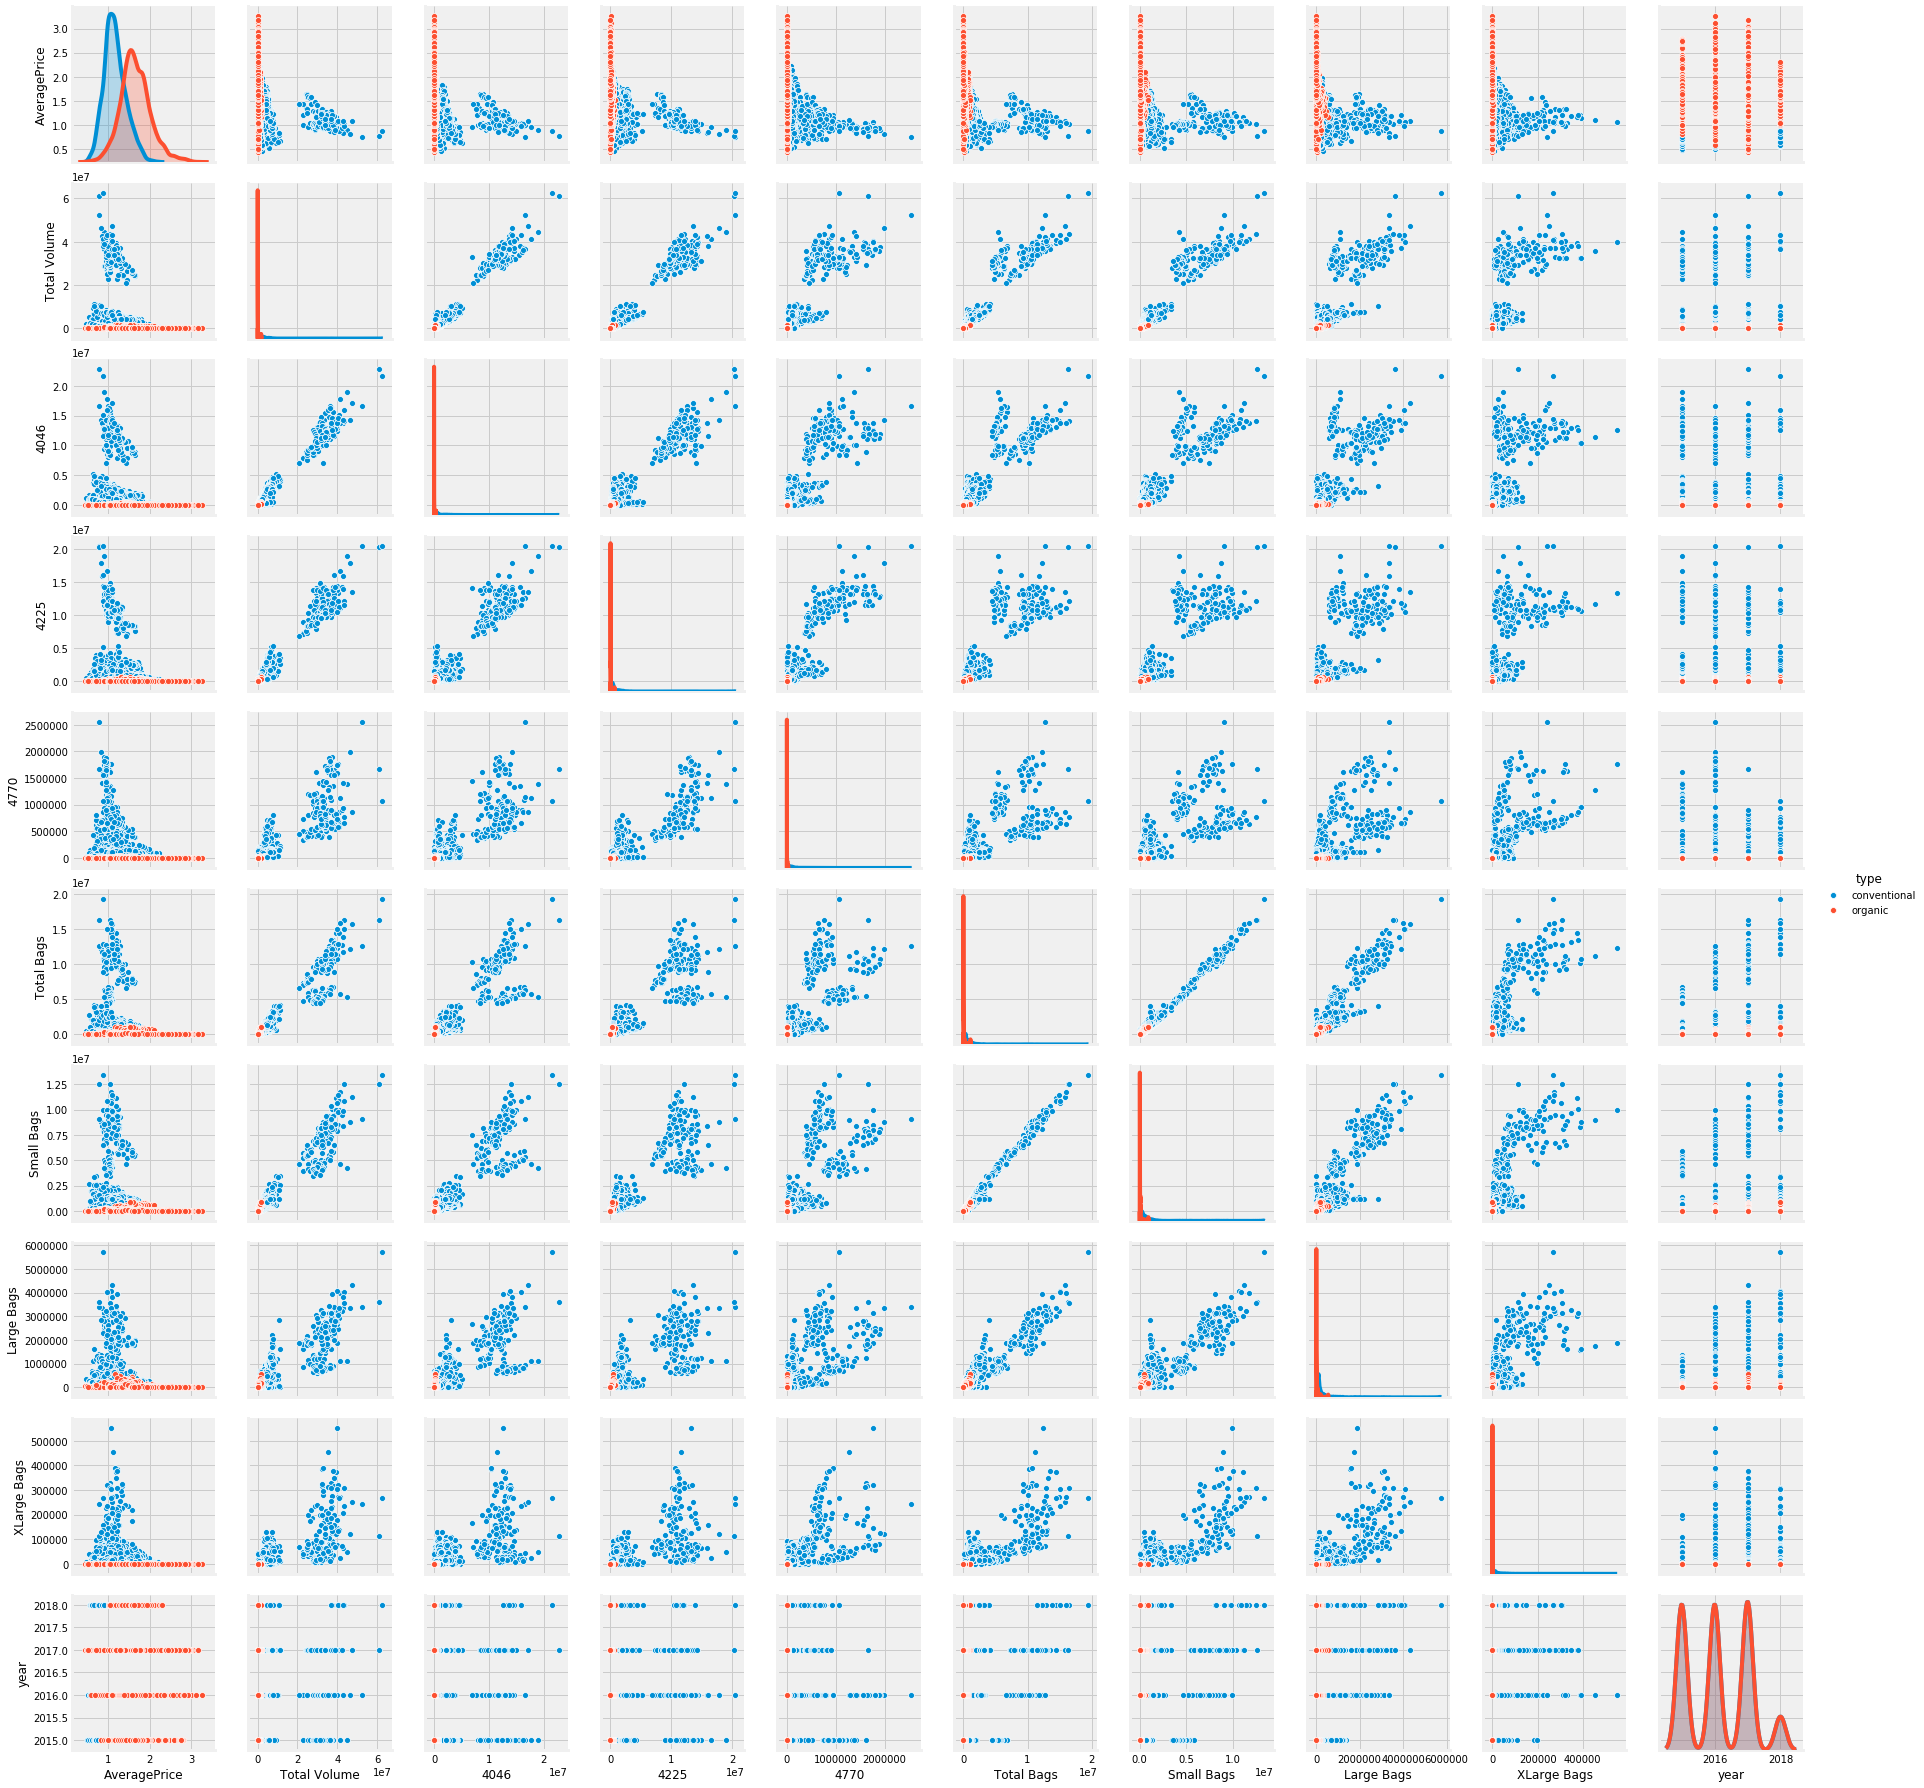

In [70]:
#--Look for trends among different features/columns:
plotting = avocado.copy()

plot = plotting[['Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year']]
sns.pairplot(plot, hue='type')

### Initial Findings

Plot distribution of type by Average Price - noticing there seemed to be a difference between organic and ocnventional prices, I decided to take a closer look. It seems that, as would be expected, the average price for conventional avocados is lower than that for organic avocados. 

**Initial noted relationships in the data:**

Looking at the pairplots for the organic and conventional data, there seem to be what looks like a few linear relationships that could be explored further. Note, that the data is colored by year to help determine any other patterns that may be apparent. 

**Conventional**
In the conventional pairplot, there seem to be linear relationships between the following variables:
- Total Volume and Small and Large avocados
- Total Volume and Total Bags
- Total Bags and Small Bags

**Organic**
In the organic pairplot, there seem to be linear relationships between the following variables:
- Total Volume and Small and Large(somewhat) avocados
- Total Volume and Total Bags
- Total Bags and Small Bags

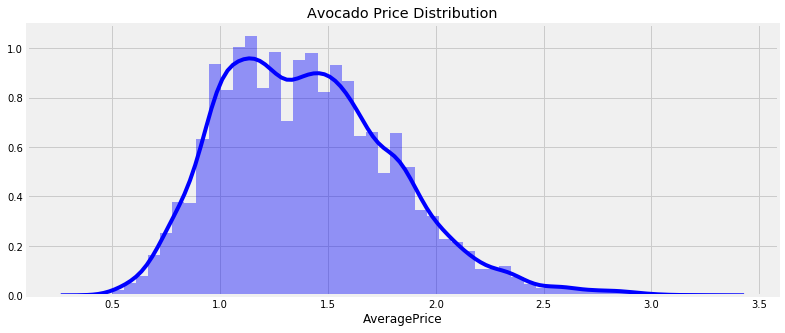

In [71]:
#--Price Distribution--
#--Source: https://www.kaggle.com/hely333/explore-avocados-from-all-sides

#--Look at average pricing without sorting by type, the data looks bimodal--
#--The next plot will sort the data into organic and conventional to get a better look at price distributions--

plt.figure(figsize=(12,5))
plt.title("Avocado Price Distribution")
ax = sns.distplot(avocado["AveragePrice"], color = 'b')

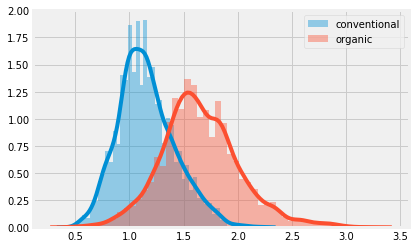

In [72]:
#--Inspiration/Source: https://www.kaggle.com/tmcketterick/bravo-cado

conv = plotting.loc[plotting.type=='conventional']
org = plotting.loc[plotting.type=='organic']

sns.distplot(conv[['AveragePrice']], hist=True, label='conventional')
sns.distplot(org[['AveragePrice']], hist=True, label='organic')

plt.legend()
plt.show()

### Overlay average prices each year 

In [73]:
#--Average prices for conventional avocados per year of data given

conv2015 = avocado[avocado['year']==2015]
conv2015 = conv2015.groupby(['Date'], as_index=False)['AveragePrice'].mean()

conv2016 = avocado[avocado['year']==2016]
conv2016 = conv2016.groupby(['Date'], as_index=False)['AveragePrice'].mean()

conv2017 = avocado[avocado['year']==2017]
conv2017 = conv2017.groupby(['Date'], as_index=False)['AveragePrice'].mean()

conv2018 = avocado[avocado['year']==2018]
conv2018 = conv2018.groupby(['Date'], as_index=False)['AveragePrice'].mean()

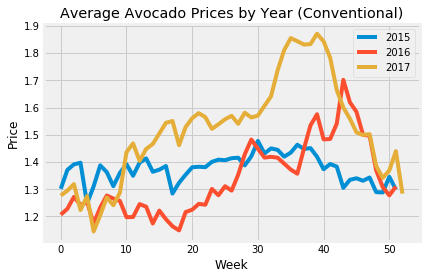

In [74]:
#--Plot 2015, 2016, 2017 average prices--
plt.plot(conv2015['AveragePrice'])
plt.plot(conv2016['AveragePrice'])
plt.plot(conv2017['AveragePrice'])
# plt.plot(conv2018['AveragePrice'])
plt.title("Average Avocado Prices by Year (Conventional)")
plt.xlabel("Week")
plt.ylabel("Price")
plt.legend(['2015', '2016', '2017'],
           loc='upper right');

#### Findings
Avocado prices for conventional avocados look to have a general upward trend for each of the years, peak around week 40 or 45, then decrease until week 52. 

### Overlay average total volume sold each year 

In [75]:
#--Average volume sold for conventional avocados per year of data given

conv2015 = avocado[avocado['year']==2015]
conv2015 = conv2015.groupby(['Date'], as_index=False)['Total Volume'].mean()

conv2016 = avocado[avocado['year']==2016]
conv2016 = conv2016.groupby(['Date'], as_index=False)['Total Volume'].mean()

conv2017 = avocado[avocado['year']==2017]
conv2017 = conv2017.groupby(['Date'], as_index=False)['Total Volume'].mean()

conv2018 = avocado[avocado['year']==2018]
conv2018 = conv2018.groupby(['Date'], as_index=False)['Total Volume'].mean()

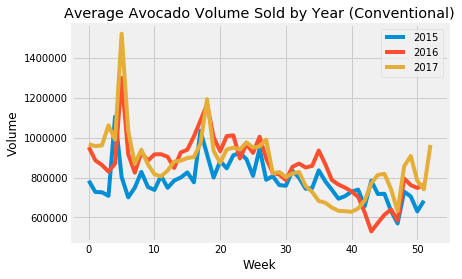

In [76]:
#--Plot 2015, 2016, 2017 average total volume sold--
plt.plot(conv2015['Total Volume'])
plt.plot(conv2016['Total Volume'])
plt.plot(conv2017['Total Volume'])
plt.title("Average Avocado Volume Sold by Year (Conventional)")
plt.xlabel("Week")
plt.ylabel("Volume")
plt.legend(['2015', '2016', '2017'],
           loc='upper right');

#### Findings
Avocado volume sold for conventional avocados look to have a peak in the beginning of February (week 5) and the beginning of May (week 18 or so).


## 1. Avocado Sales Trends - Price, Volume
- a. Look at general trends, is it normally distributed
- b. Look at stationarity

Time series analysis of organic and conventional avocado prices grouped together

In [77]:
#--Source: https://www.kaggle.com/tmcketterick/bravo-cado
#--Function to create time series plots--

#--Will use this for thesis data when determining population per camp over time--

def time_series(column):
    traces = []
    for typ in avocado['type'].unique():
        tmp = avocado[avocado['type']==typ]
        tmp = tmp.groupby(['Date'], as_index=False)[column].mean()
        traces.append(go.Scatter(x=tmp['Date'], y=tmp[column], name=typ))
    layout = dict(title = column,
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )
    fig = dict(data=traces, layout=layout)
    return iplot(fig)

In [78]:
#--Average Price of all avocado types over time--
time_series('AveragePrice')

In [79]:
#--Total Volume of avocados sold over time--
time_series('Total Volume')

In [80]:
#--Total Bags sold over time--
time_series('Total Bags')

In [81]:
#--Small Bags sold over time--
time_series('Small Bags')

In [82]:
#--Large Bags sold over time--
time_series('Large Bags')

In [83]:
#--XLarge Bags sold over time--
time_series('XLarge Bags')

### Looking to see if the data has stationarity

In [54]:
conventional = avocado[avocado.type=="conventional"]
organic = avocado[avocado.type=="organic"]

groupBy1_volume = conventional.groupby('Date').mean()
groupBy2_volume = organic.groupby('Date').mean()

x=groupBy1_volume['Total Volume']
x2=groupBy2_volume['Total Volume']

In [75]:
#--Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, typ):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation - {} Volume Sold'.format(typ))
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

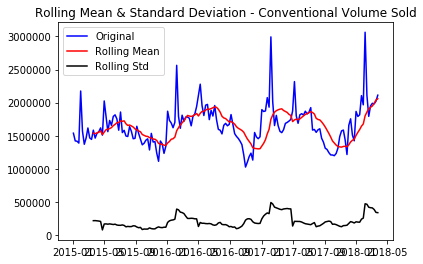

Results of Dickey-Fuller Test:
Test Statistic                  -2.983466
p-value                          0.036468
#Lags Used                      13.000000
Number of Observations Used    155.000000
Critical Value (1%)             -3.473259
Critical Value (5%)             -2.880374
Critical Value (10%)            -2.576812
dtype: float64


In [76]:
test_stationarity(x, "Conventional")

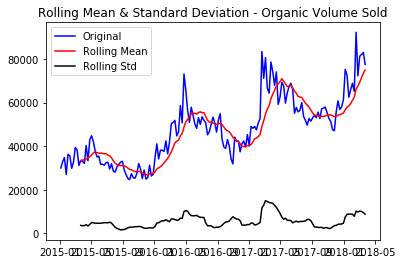

Results of Dickey-Fuller Test:
Test Statistic                  -1.178704
p-value                          0.682689
#Lags Used                       6.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64


In [77]:
test_stationarity(x2,"Organic")

## 2. Forecast for Volume of Avocados Sold

Conventional Avocados Sold Over Time

In [70]:
conventional = avocado[avocado.type=="conventional"]
organic = avocado[avocado.type=="organic"]

groupBy1_volume = conventional.groupby('Date').mean()
groupBy2_volume = organic.groupby('Date').mean()

scatter1 = go.Scatter(x=groupBy1_volume['Total Volume'].index, y=groupBy1_volume['Total Volume'], name="Conventional")

scatter2 = go.Scatter(x=groupBy2_volume['Total Volume'].index, y=groupBy2_volume['Total Volume'], name="Organic")

data = [scatter1]
# data = [scatter1, scatter2]
# layout=go.Layout(title="Volume of Conventional Avocados Sold Over Time", xaxis={'title':'Date'}, yaxis={'title':'Volume'})

#--Rangeslider and Selector Source: https://plot.ly/python/range-slider/
layout = dict(
    title='Volume of Conventional Avocados Sold Over Time',
    yaxis = dict(
    title = 'Volume'),
    xaxis=dict(
        title = 'Date',
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')

            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

figure=go.Figure(data=data,layout=layout)
iplot(figure)

In [59]:
groupBy1_volume

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,,
2015-01-04,51,1.009630,1.538052e+06,6.012428e+05,6.717628e+05,41977.973333,223068.224815,178194.034259,43937.957407,936.233148,2015
2015-01-11,50,1.111296,1.421895e+06,5.610088e+05,5.947014e+05,43309.042037,222875.642407,186732.530000,35341.695000,801.417407,2015
2015-01-18,49,1.133519,1.416863e+06,5.764537e+05,5.709807e+05,40690.031296,228738.393148,190612.723333,37730.401296,395.268519,2015
2015-01-25,48,1.115370,1.389043e+06,5.880229e+05,5.254037e+05,38245.927407,237370.033333,196953.430741,39981.156296,435.446296,2015
2015-02-01,47,0.962037,2.175782e+06,9.163940e+05,9.260567e+05,67990.370926,265340.896667,208198.950185,54814.104630,2327.841852,2015
2015-02-08,46,1.030370,1.569482e+06,6.396392e+05,6.610987e+05,36737.757963,232006.194074,198144.720741,33169.062963,692.410370,2015
2015-02-15,45,1.129074,1.370835e+06,6.158874e+05,4.799066e+05,41533.041667,233508.210926,201158.484074,31758.786481,590.940370,2015
2015-02-22,44,1.099815,1.465066e+06,6.150704e+05,5.572627e+05,46438.801111,246293.833519,213271.823333,32366.653519,655.356667,2015
2015-03-01,43,1.036852,1.616840e+06,6.473587e+05,6.758908e+05,52806.150926,240784.691296,202616.512778,35531.554259,2636.624259,2015


In [87]:
scatter1 = go.Scatter(x=groupBy1_volume['Total Volume'].index, y=groupBy1_volume['Total Volume'], name="Conventional")

scatter2 = go.Scatter(x=groupBy2_volume['Total Volume'].index, y=groupBy2_volume['Total Volume'], name="Organic")

data = [scatter1]
# data = [scatter1, scatter2]
layout=go.Layout(title="Volume of Avocados Sold Over Time (Conventional)", xaxis={'title':'Date'}, yaxis={'title':'Volume'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

### 2a. Predictions for Conventional Avocados

In [110]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
series = [i+randrange(10) for i in range(1,100)]
# series

In [111]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
data = groupBy1_volume['Total Volume']
result = seasonal_decompose(data, model='multiplicative')
# result.plot()

#### Future Forecasting Using Prophet (Conventional)

In [43]:
#--Source: https://www.kaggle.com/yemregundogmus/avocado-prices-analysis-and-prediction

df_co = conventional[["Date","Total Volume"]]
df_co['Date'] = pd.DatetimeIndex(df_co['Date'])
df_co.dtypes

Date            datetime64[ns]
Total Volume           float64
dtype: object

In [44]:
df_co = df_co.rename(columns={'Date': 'ds',
                        'Total Volume': 'y'})

In [45]:
my_model = Prophet()
my_model.fit(df_co)

future_dates = my_model.make_future_dataframe(periods=900)
forecast = my_model.predict(future_dates)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


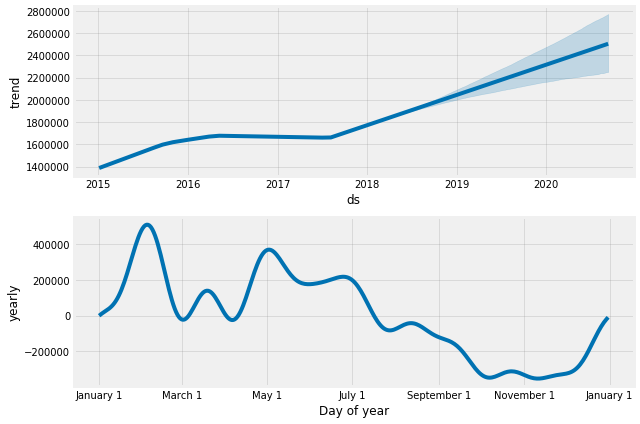

In [51]:
#--Forecast for Conventional Volume of Avocados Sold--
fig2 = my_model.plot_components(forecast)

In [46]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.387389e+06,-4.446347e+06,7.593252e+06,1.387389e+06,1.387389e+06,14536.733171,14536.733171,14536.733171,14536.733171,14536.733171,14536.733171,0.0,0.0,0.0,1.401925e+06
1,2015-01-04,1.387389e+06,-4.396954e+06,7.712483e+06,1.387389e+06,1.387389e+06,14536.733171,14536.733171,14536.733171,14536.733171,14536.733171,14536.733171,0.0,0.0,0.0,1.401925e+06


In [47]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

Red = Predicted Values, Blue = Base Values


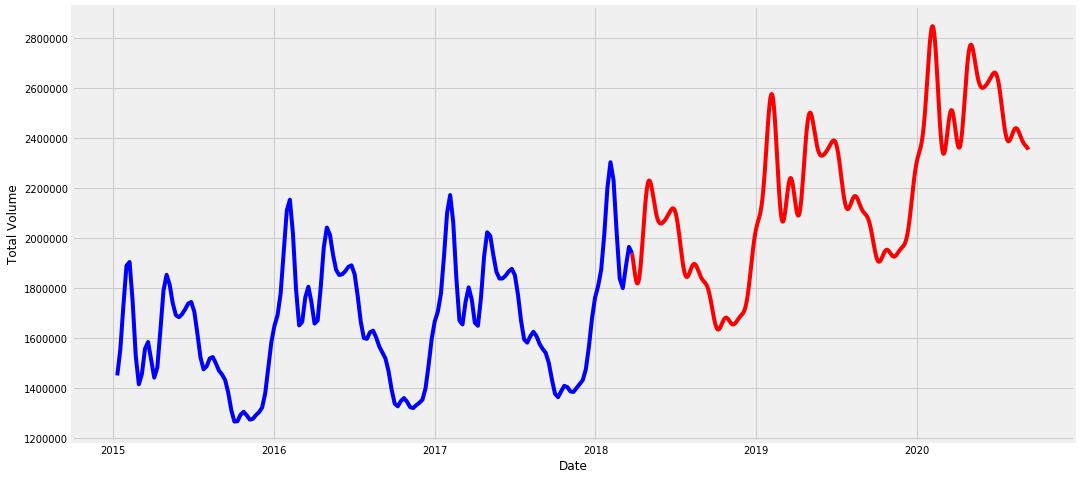

In [49]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Total Volume')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

Organic Avocados Sold Over Time

#### Future Forecasting (Organic)

In [114]:
data = [scatter2]
# data = [scatter1, scatter2]
layout=go.Layout(title="Volume of Avocados Sold Over Time (Organic)", xaxis={'title':'Date'}, yaxis={'title':'Volume'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

Predictions for Organic Avocados

In [52]:
df_o = organic[["Date","Total Volume"]]
df_o['Date'] = pd.DatetimeIndex(df_o['Date'])
df_o.dtypes

Date            datetime64[ns]
Total Volume           float64
dtype: object

In [53]:
df_o = df_o.rename(columns={'Date': 'ds',
                        'Total Volume': 'y'})

In [54]:
my_model = Prophet()
my_model.fit(df_o)

future_dates = my_model.make_future_dataframe(periods=900)
forecast = my_model.predict(future_dates)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


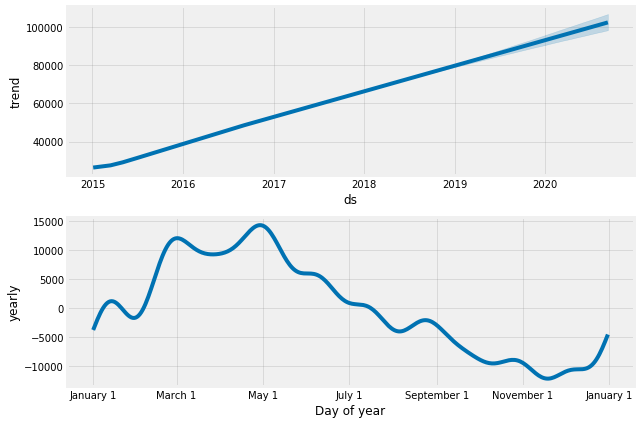

In [55]:
fig2 = my_model.plot_components(forecast)

In [56]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

Red = Predicted Values, Blue = Base Values


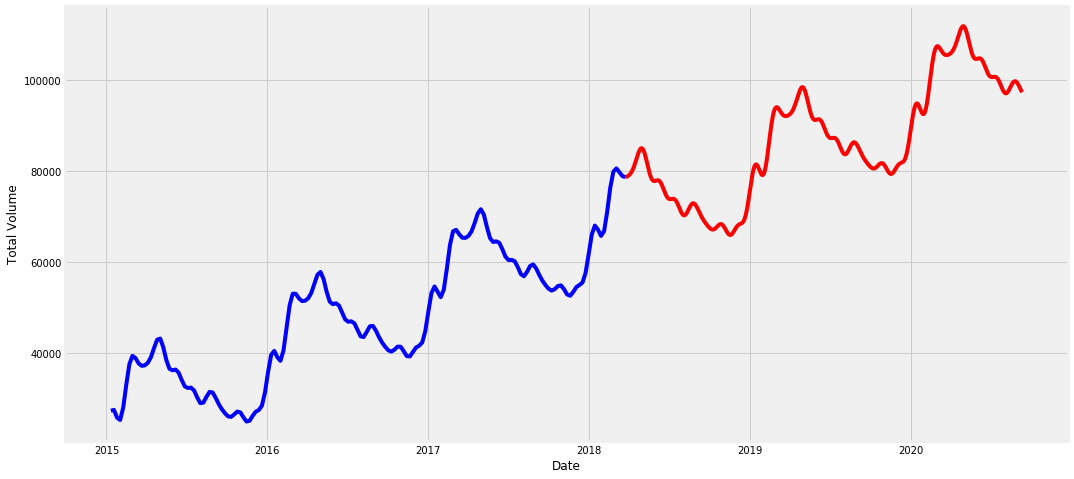

In [58]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Total Volume')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

## 3. Are there Seasonal Trends in the Data?

![GuacUrl](https://media1.tenor.com/images/44c49a9e241d3495d623931ab189aa8d/tenor.gif?itemid=12255516 "guac")

## Predictions


### Super Bowl 

Super Bowl Dates: 
- Feb 4, 2018
- Feb 5, 2017
- Feb 7, 2016
- Feb 1, 2015

- There looks to be a drop in price the week of the Super Bowl for each of the 4 years
- There looks to be an uptick in Total Volume sales each of the 4 years, but in conventional avocado sales only

- Articles about avocado sales and the Super Bowl: https://www.cbc.ca/radio/undertheinfluence/how-the-super-bowl-saved-the-avocado-1.4513613
- "Over 105 million pounds of avocados are now consumed on Super Bowl Sunday, making it the biggest avocado day of the year." -CBC Radio

### Cinco De Mayo

- It looks like there is a small uptick in sales the week of Cinco de Mayo.

In [85]:
conventional = avocado[avocado.type=="conventional"]
organic = avocado[avocado.type=="organic"]

groupBy1_volume = conventional.groupby('Date').mean()
groupBy2_volume = organic.groupby('Date').mean()

x=groupBy1_volume['Total Volume'] 
x2=groupBy2_volume['Total Volume']

In [89]:
scatter1 = go.Scatter(x=groupBy1_volume['Total Volume'].index, y=groupBy1_volume['Total Volume'], name="Conventional")

scatter2 = go.Scatter(x=groupBy2_volume['Total Volume'].index, y=groupBy2_volume['Total Volume'], name="Organic")

data = [scatter1]
# data = [scatter1, scatter2]
layout=go.Layout(title="Volume of Avocados Sold Over Time (Conventional)", xaxis={'title':'Date'}, yaxis={'title':'Volume'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

TypeError: 'DataFrame' object is not callable

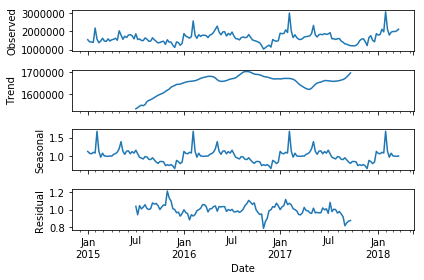

In [112]:
#--Decomposition of Time Series
#--Source: https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
#--Source: Decompose Time Series: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
data = groupBy1_volume['Total Volume']
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()
# plot_mpl(fig)
plot(fig)

In [267]:
conv = avocado[avocado['type']=='conventional']
org = avocado[avocado['type']=='organic']
# price_mean_c = conv.groupby(['Date'])['AveragePrice'].mean

avg_conv = conv.groupby(['Date'])['AveragePrice'].mean()
avg_org = org.groupby(['Date'])['AveragePrice'].mean()

In [92]:
data = [scatter2]
# data = [scatter1, scatter2]
layout=go.Layout(title="Volume of Avocados Sold Over Time (Organic)", xaxis={'title':'Date'}, yaxis={'title':'Volume'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

TypeError: 'DataFrame' object is not callable

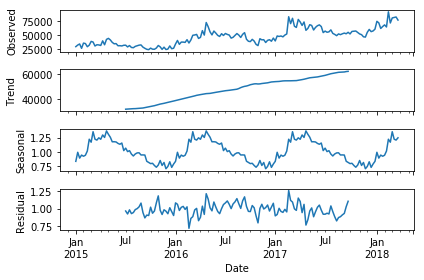

In [113]:
#--Results:
#--Residuals do not have homoscedasticity...are not normal
#--Seasonal trends are present and distinct
#--Trend is pretty much linear

from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
data = groupBy2_volume['Total Volume']
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()
# plot_mpl(fig)
plot(fig)

## 4. Are price differences statistically significant in two cities with similar population sizes and in a similar region?

First let's take a look at general price trends for each city for all 4 years of data.

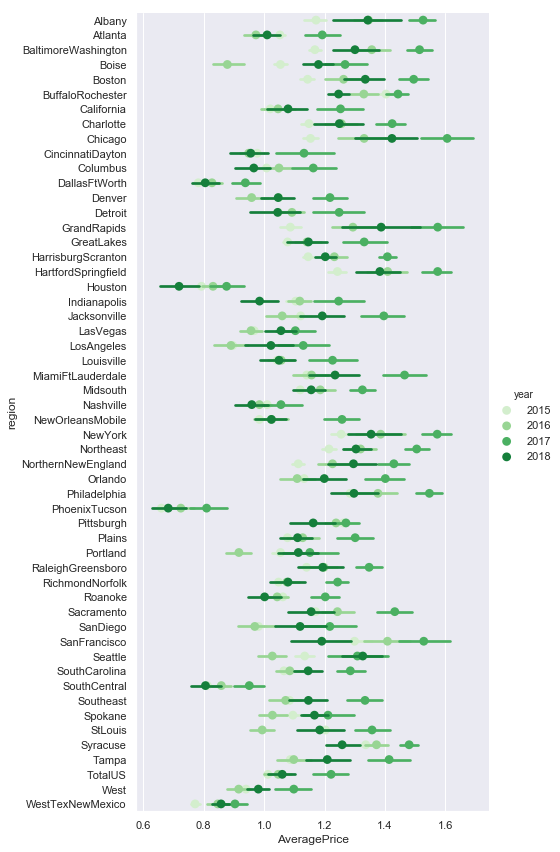

In [210]:
#--Source: https://www.kaggle.com/neuromusic/avocado-prices-across-regions-and-seasons

#--This shows general trends by city, region, and Total US over the 4 year span--
mask = avocado['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=avocado[mask],
                   hue='year',
                   size=12,
                   aspect=0.6,
                   palette='Greens',
                   join=False,
              )

2017 Seems to be the year where the prices are the highest. Sorting by 2017 to get an idea of price ranges from region to region.

In [211]:
order = (
    avocado[mask & (avocado['year']==2017)]
    .groupby('region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)

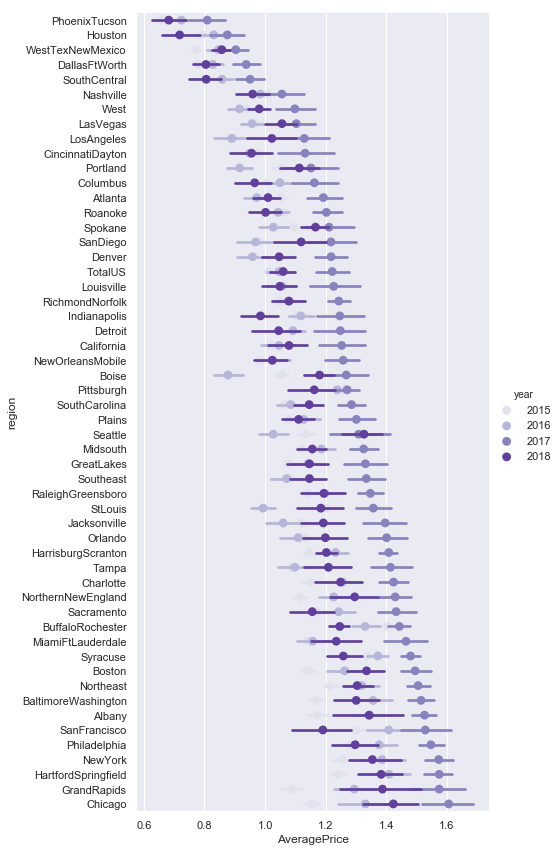

In [212]:
g = sns.factorplot('AveragePrice','region',data=avocado[mask],
                   hue='year',
                   size=12,
                   aspect=0.6,
                   palette='Purples',
                   order=order,
                   join=False,
              )

Phoenix seems to have the lowest average price for 2017, while Chicago has te highest average price for 2017. Let's compare 2 cities to see how they differ, specifically, Seattle and Portland. The assumption would be that prices may be similar because they are in the same region of the country and have similar population sizes. 

### Look at average price by month for 2 cities, are they similar or significantly different? Let's look at Seattle and Portland.

- Seattle, WA population size in 2017: 724,745
- Portland, OR population size in 2017: 647,805

![AvoUrl_1](seattle_to_portland_map.png "avo_1")

In [135]:
regions = ['Portland', 'Seattle', 'TotalUS']

In [136]:
seattle_prices = avocado.groupby(['region']).get_group('Seattle')['AveragePrice']
portland_prices = avocado.groupby(['region']).get_group('Portland')['AveragePrice']

In [137]:
#--Compare two prices using a t-test--
from scipy.stats import ttest_ind

ttest_ind(seattle_prices,portland_prices)

#--Looking at the p-values, where they are less than 0.05, it looks like the price distributions are separate, 
#--if they came from the same distribution, the p-value would not be so low 

Ttest_indResult(statistic=3.4649408061786793, pvalue=0.0005639590854244293)

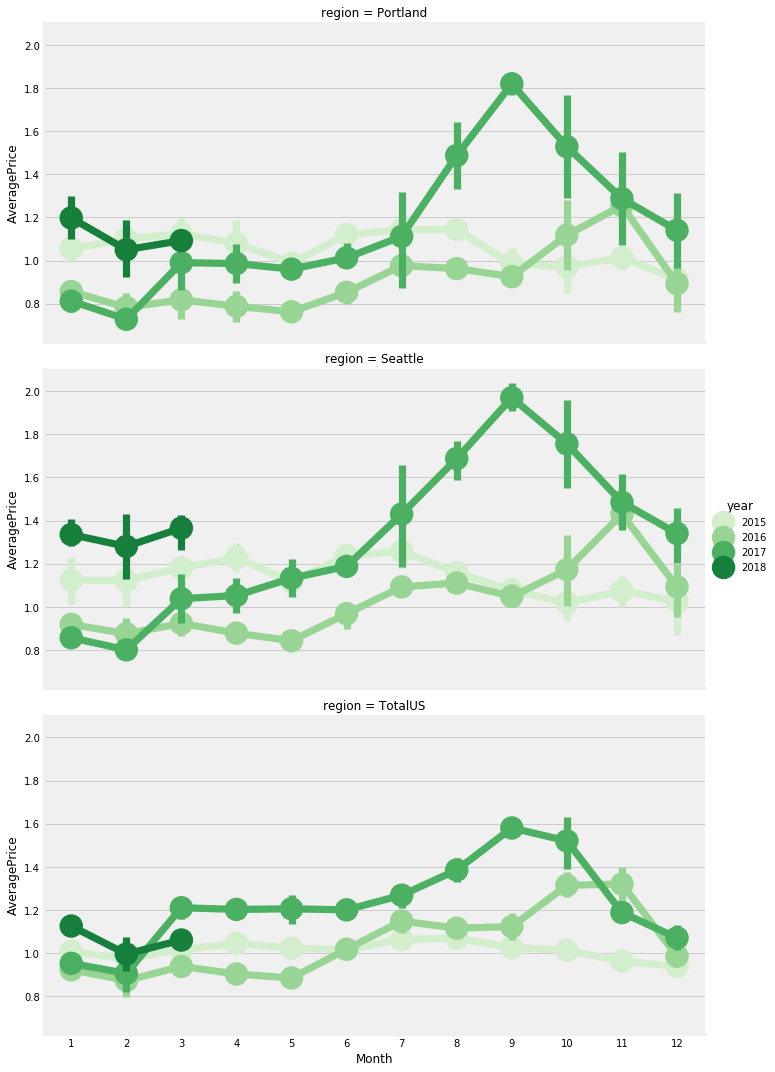

In [140]:
# mask = (avocado['region'].isin(regions) & avocado['type'] == 'conventional')

mask = (
    avocado['region'].isin(regions)
    & (avocado['type']=='conventional')
)

g = sns.factorplot('Month','AveragePrice',data=avocado[mask],
               hue='year',
               row='region',
               aspect=2,
               palette='Greens',
              )

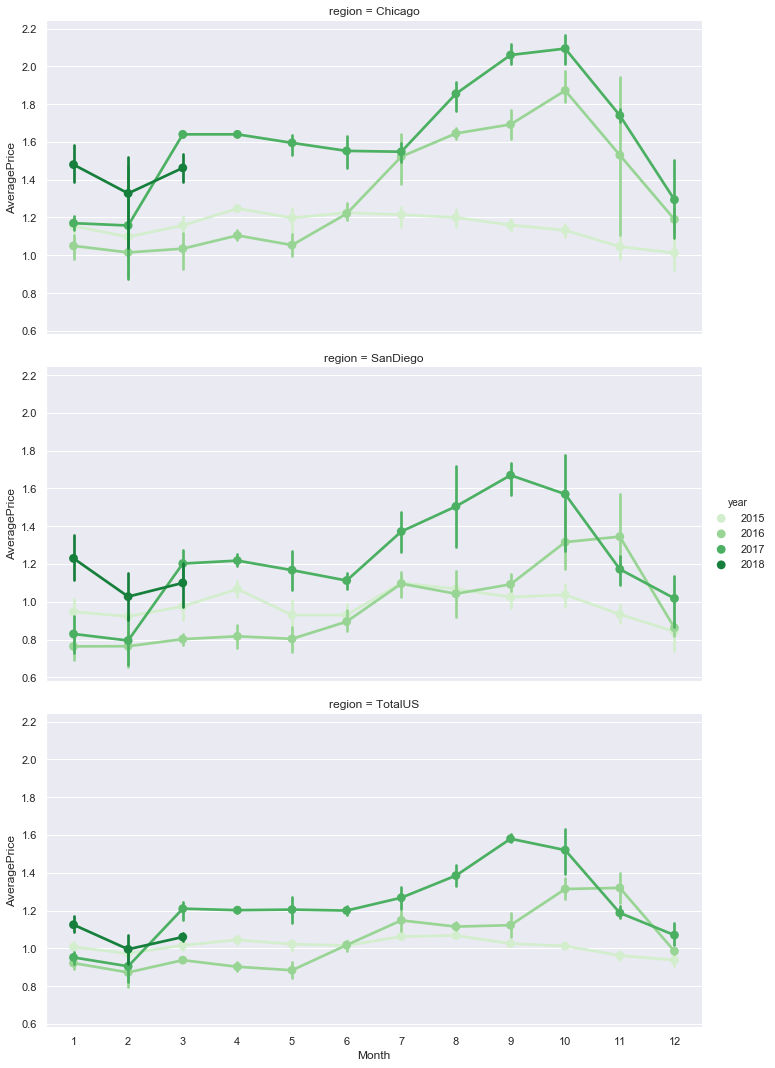

In [194]:
# g = sns.factorplot('Month','AveragePrice',data=avocado[mask],
#                hue='year',
#                row= 'regions',
#                aspect=2,
#                palette='Greens',
#               )

g = sns.factorplot('Month','AveragePrice',data=avocado[mask],
               hue='year',
               row='region',
               aspect=2,
               palette='Greens',
              )

## Future Work

### Create dataframes within conventional and organic that include either only cities, regions, or Total US
Note: This will help with paring down the data to look at specific relationships regarding location and time.

In [91]:
city_region_lst = ['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']

#--remove city names--
region_lst1 = ['California', 'GreatLakes', 
       'Midsouth', 'Northeast', 'NorthernNewEngland', 'Plains', 
       'SouthCentral', 'TotalUS', 'West', 'WestTexNewMexico']

region_lst2 = ['GreatLakes', 'TotalUS', 'West']

city_lst = []
for city in city_region_lst:
    if city not in region_lst:
        city_lst.append(city)


#### Total US Dataframes

In [31]:
total_us_conv = avo_conv[avo_conv['region'] == 'TotalUS']
total_us_org = avo_org[avo_org['region'] == 'TotalUS']

In [33]:
total_us_conv.year.value_counts()

2017    53
2016    52
2015    52
2018    12
Name: year, dtype: int64

#### Regions Dataframes

In [97]:
#--Source: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas

#--These have all of the regions--
regions_conv = avo_conv.loc[avo_conv['region'].isin(region_lst1)]
regions_org = avo_org.loc[avo_org['region'].isin(region_lst1)]

#--These include only the West, Great Lakes, and Total US--
regions_conv_few = avo_conv.loc[avo_conv['region'].isin(region_lst2)]
regions_org_few = avo_org.loc[avo_org['region'].isin(region_lst2)]

In [99]:
regions_org.year.value_counts()

2017    528
2016    520
2015    519
2018    120
Name: year, dtype: int64

In [96]:
regions_org.region.value_counts()

NorthernNewEngland    169
GreatLakes            169
Northeast             169
Midsouth              169
West                  169
California            169
SouthCentral          169
TotalUS               169
Plains                169
WestTexNewMexico      166
Name: region, dtype: int64

In [98]:
regions_org

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9438,0,2015-12-27,1.45,98576.63,14306.68,50893.97,0.00,33375.98,29507.45,3868.53,0.00,organic,2015,California
9439,1,2015-12-20,1.35,99793.55,12746.47,48195.95,1.52,38849.61,25535.80,13313.81,0.00,organic,2015,California
9440,2,2015-12-13,1.39,98605.40,13609.24,46518.56,3.05,38474.55,24359.79,14114.76,0.00,organic,2015,California
9441,3,2015-12-06,1.48,91211.53,17839.96,47527.65,1.53,25842.39,25661.06,181.33,0.00,organic,2015,California
9442,4,2015-11-29,1.75,83415.54,13195.19,48229.29,0.00,21991.06,21671.70,319.36,0.00,organic,2015,California
9443,5,2015-11-22,1.60,89062.36,14803.41,51282.80,0.00,22976.15,22516.44,459.71,0.00,organic,2015,California
9444,6,2015-11-15,1.59,97265.23,16244.94,59089.47,0.00,21930.82,21274.01,656.81,0.00,organic,2015,California
9445,7,2015-11-08,1.66,101320.15,17074.60,62469.04,0.00,21776.51,20005.46,1771.05,0.00,organic,2015,California
9446,8,2015-11-01,1.60,104331.19,20050.21,63408.14,0.00,20872.84,20158.50,714.34,0.00,organic,2015,California
9447,9,2015-10-25,1.64,103918.03,20902.94,66867.39,0.00,16147.70,15174.85,972.85,0.00,organic,2015,California


#### Great Lakes and West Coast vs. Total US

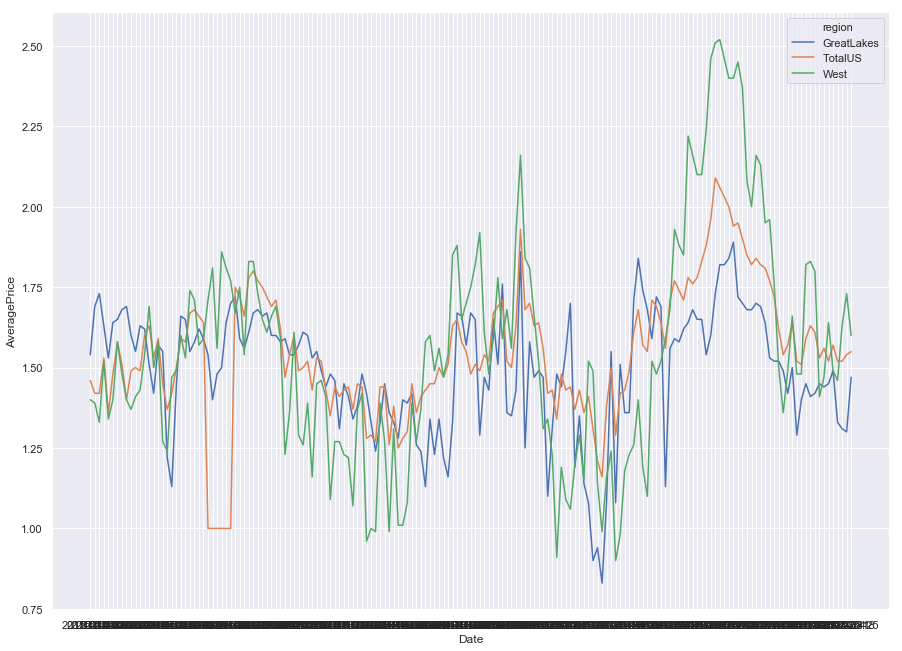

In [101]:
#-- Look up LOESS Smoothing

import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="Date", y="AveragePrice", hue='region', 
             data=regions_org_few)

#### All regions, including Total US

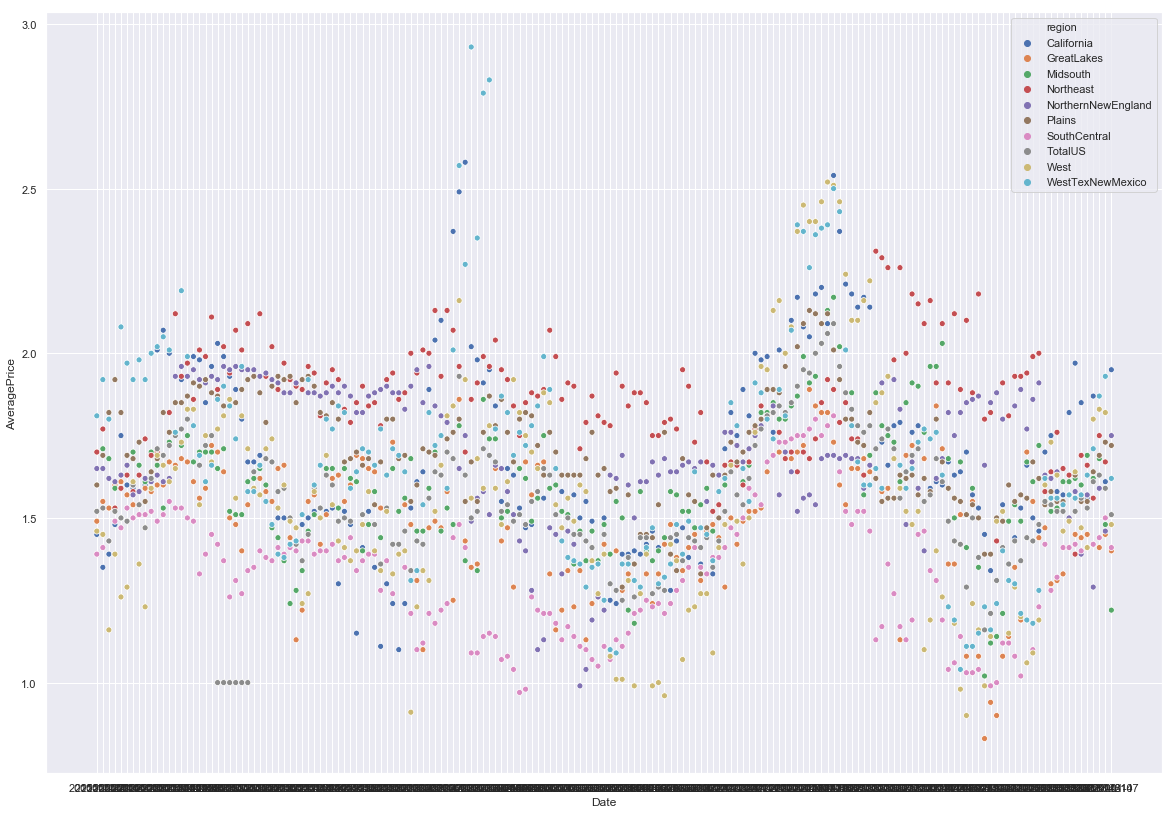

In [85]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(20,14)})
ax = sns.scatterplot(x="Date", y="AveragePrice", hue='region', data=regions_org)

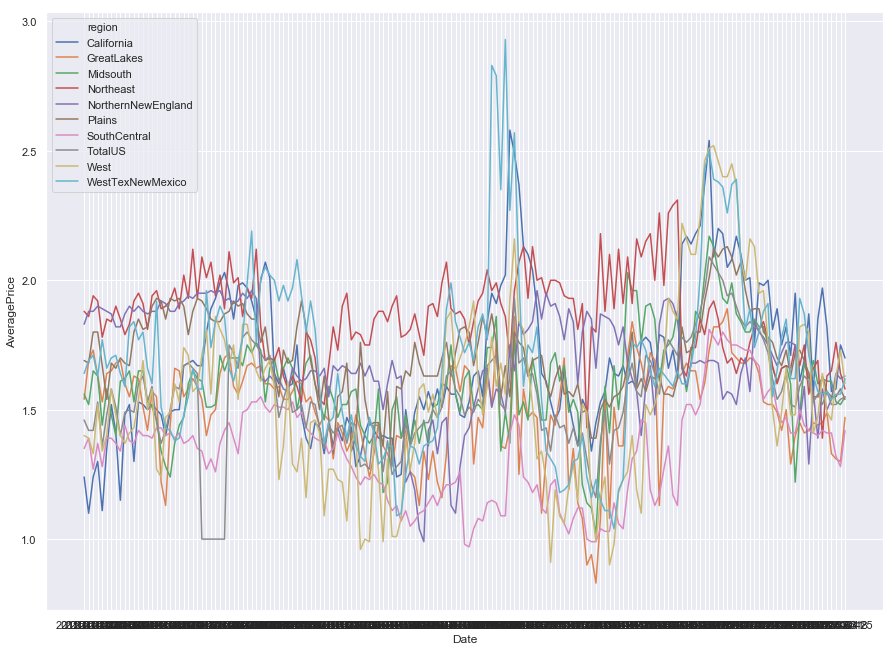

In [71]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="Date", y="AveragePrice", hue='region', 
             data=regions_org)